In [18]:
from numpy import *
def loadDataSet(fileName):
    with open(fileName) as f1:
        content = f1.readlines()
        lines = [list(map(float,line.strip("\n").split("\t"))) for line in content]
    return mat(lines)

def pca(dataMat,topNfeat = 9999):
    meanVal = mean(dataMat,axis=0)
    meanRemoved = dataMat - meanVal
    covMat = cov(meanRemoved,rowvar=0)#协方差矩阵
    eigVals,eigVects = linalg.eig(mat(covMat)) #特征值和特征向量
    eigInd = argsort(eigVals)[::-1][0:topNfeat] #从大到小排序
    redEigVects = eigVects[:,eigInd] #
    lowData = meanRemoved * redEigVects #降维后的数据
    reconMat = (lowData * redEigVects.T) + meanVal #重构后的数据
    return lowData,reconMat

In [19]:
dataMat=loadDataSet('testSet.txt')
lowDMat,reconMat=pca(dataMat,1)
print(shape(lowDMat))

(1000, 1)


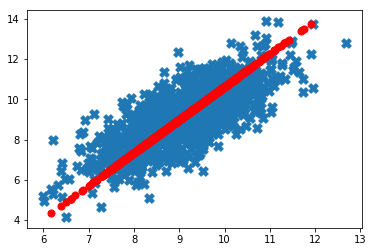

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],marker="X",s = 90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker="o", s=50,c ="red")
plt.show()